In [1]:
import datetime
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sn
import glob
from NNI.utils.utils import create_directory


In [2]:
def MN_activity_heatmap(activity_df, lbl_string, save_fig=False, path_to_save=None):


    # For the activity classification:
    labels_mapping = {
        'A': "Tonic spiking",
        'B': "Class 1",
        'C': "Spike frequency adaptation",
        'D': "Phasic spiking",
        'E': "Accommodation",
        'F': "Threshold variability",
        'G': "Rebound spike",
        'H': "Class 2",
        'I': "Integrator",
        'J': "Input bistability",
        'K': "Hyperpolarizing spiking",
        'L': "Hyperpolarizing bursting",
        'M': "Tonic bursting",
        'N': "Phasic bursting",
        'O': "Rebound burst",
        'P': "Mixed mode",
        'Q': "Afterpotentials",
        'R': "Basal bistability",
        'S': "Preferred frequency",
        'T': "Spike latency",
    }
    grouped = activity_df[["Letter","Probabilities"]].groupby("Letter", as_index=False).mean()
    classified_activity_df = pd.DataFrame(index=range(len(lbl_string)), columns=range(len(list(labels_mapping.values()))))
    for ii in range(len(lbl_string)):
        for jj in range(len(list(labels_mapping.keys()))):
            classified_activity_df.iloc[ii,jj] = float(grouped[grouped["Letter"]==lbl_string[ii]]["Probabilities"].item()[-1][jj])
    classified_activity_df = classified_activity_df.apply(pd.to_numeric, errors='coerce')
    return classified_activity_df


In [3]:
folder = 'results/activity_classification/MN_activity/MN_output_Braille/*'
files = glob.glob(folder)
print(files)
print(len(files))

['results/activity_classification/MN_activity/MN_output_Braille/GR_braille_w_17_test_20240116_105004.pkl', 'results/activity_classification/MN_activity/MN_output_Braille/GR_braille_w_7_train_20240116_105004.pkl', 'results/activity_classification/MN_activity/MN_output_Braille/GR_braille_w_1_test_20240116_105004.pkl', 'results/activity_classification/MN_activity/MN_output_Braille/GR_braille_w_5_eval_20240116_105004.pkl', 'results/activity_classification/MN_activity/MN_output_Braille/GR_braille_w_13_train_20240116_105004.pkl', 'results/activity_classification/MN_activity/MN_output_Braille/GR_braille_w_5_train_20240116_105004.pkl', 'results/activity_classification/MN_activity/MN_output_Braille/GR_braille_w_12_train_20240116_105004.pkl', 'results/activity_classification/MN_activity/MN_output_Braille/GR_braille_w_16_eval_20240116_105004.pkl', 'results/activity_classification/MN_activity/MN_output_Braille/GR_braille_w_16_test_20240116_105004.pkl', 'results/activity_classification/MN_activity/

(array([439., 504., 331., 506., 407., 360., 602., 421., 511., 472., 450.,
        407., 517., 363., 525., 507., 385., 363., 502., 352., 381., 470.,
        350., 429., 504., 719.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26.]),
 <BarContainer object of 26 artists>)

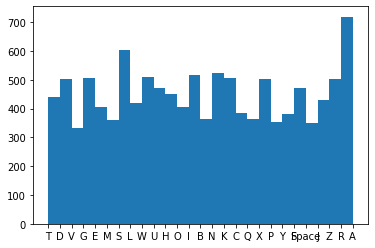

In [4]:
activity = pd.read_pickle(files[0])
plt.hist(activity['Letter'], bins=26)

In [5]:
activity

,Letter,Behaviour,Probabilities,Spikes,Sparsity
0,T,O,"[[0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",49,0.8444
1,D,C,"[[0.0, 0.0, 87.56, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",19,0.9397
2,D,A,"[[45.77, 0.11, 0.0, 0.0, 0.11, 0.02, 45.77, 0....",1,0.9968
3,V,A,"[[31.89, 0.0, 31.89, 0.0, 0.0, 0.0, 0.0, 31.89...",91,0.7111
4,G,A,"[[49.99, 0.0, 0.0, 0.0, 0.0, 0.0, 49.99, 0.0, ...",106,0.6635
...,...,...,...,...,...
11772,I,O,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",27,0.9143
11773,W,G,"[[0.21, 0.21, 0.0, 0.0, 0.21, 0.03, 84.23, 0.0...",1,0.9968
11774,G,A,"[[48.35, 0.0, 48.35, 0.0, 0.0, 0.0, 0.0, 0.89,...",62,0.8032
11775,X,A,"[[49.99, 0.0, 0.0, 0.0, 0.0, 0.0, 49.99, 0.0, ...",104,0.6698


In [6]:
import tqdm.notebook as tqdm
lbl_string = ['Space', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
    'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

labels_mapping = {
    'A': "Tonic spiking",
    'B': "Class 1",
    'C': "Spike frequency adaptation",
    'D': "Phasic spiking",
    'E': "Accommodation",
    'F': "Threshold variability",
    'G': "Rebound spike",
    'H': "Class 2",
    'I': "Integrator",
    'J': "Input bistability",
    'K': "Hyperpolarizing spiking",
    'L': "Hyperpolarizing bursting",
    'M': "Tonic bursting",
    'N': "Phasic bursting",
    'O': "Rebound burst",
    'P': "Mixed mode",
    'Q': "Afterpotentials",
    'R': "Basal bistability",
    'S': "Preferred frequency",
    'T': "Spike latency",
}

activity_total = []
activity_new = {'Letter':[], 'Probabilities':[],'Behaviour':[], 'seed':[], 'type':[],'dataset':[]}
import re
for f_idx in tqdm.tqdm(range(len(files))[:1]):
    
    activity = pd.read_pickle(files[f_idx])
    for row in activity.iterrows():
        for b_idx,b in enumerate(labels_mapping.keys()):
            # print(row[1]['Letter'], row[1]['Probabilities'][0][b_idx])
            activity_new['Letter'].append(row[1]['Letter'])
            activity_new['Probabilities'].append(float(row[1]['Probabilities'][0][b_idx]))
            activity_new['Behaviour'].append(labels_mapping[b])
            activity_new['seed'].append(re.findall(r'\d+', files[f_idx])[0])
            activity_new['type'].append(re.findall(r'train|eval|test', files[f_idx])[0])
            activity_new['dataset'].append('Braille')
            # print(activity_new['Letter'][-1], activity_new['Probabilities'][-1], activity_new['Behaviour'][-1], activity_new['seed'][-1], activity_new['type'][-1])
    # activity_total.append(activity_new)
    ## search for the word train, eval or test
    # classified_activity['type'] = re.findall(r'train|eval|test', file)[0]

  0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
activity_braille = pd.DataFrame(activity_new)
activity_braille = activity_braille.sort_values(by=['Letter'],ascending=True).sort_values(by=['Probabilities'],ascending=False)

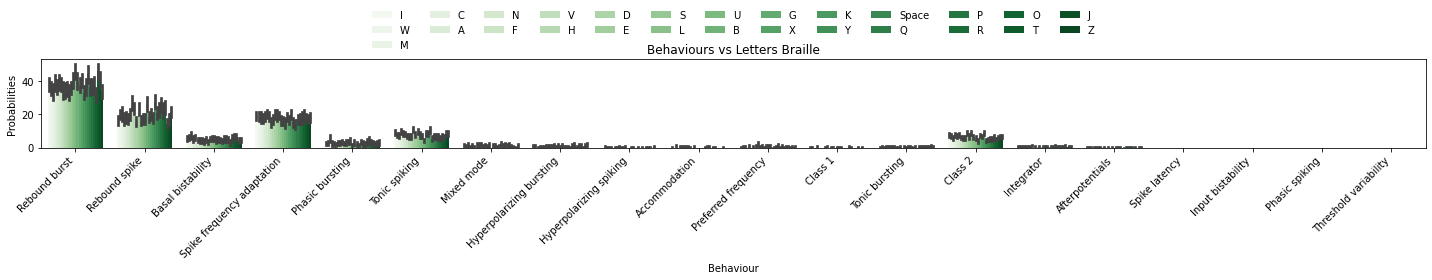

In [8]:
plt.figure(figsize=(20,4))

g = sn.barplot(x='Behaviour', y='Probabilities',hue = 'Letter',data=activity_braille,palette='Greens')#,order=activity_new.sort_values(by=['Probabilities','Letter'], ascending=False).set_index('Behaviour').index)
g.set_xticklabels(g.get_xticklabels(), rotation = 45,horizontalalignment='right')
sn.move_legend(
g, "lower center",
bbox_to_anchor=(.5, 1), ncol=int(len(activity_braille['Letter'].unique())/2), title=None, frameon=False,
)
plt.title('Behaviours vs Letters Braille')
plt.tight_layout()
plt.savefig('Probabilities_Behaviours_vs_letters_Braille',transparent= False)

In [9]:
import tqdm.notebook as tqdm
lbl_string = ['Space', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
    'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

labels_mapping = {
    'A': "Tonic spiking",
    'B': "Class 1",
    'C': "Spike frequency adaptation",
    'D': "Phasic spiking",
    'E': "Accommodation",
    'F': "Threshold variability",
    'G': "Rebound spike",
    'H': "Class 2",
    'I': "Integrator",
    'J': "Input bistability",
    'K': "Hyperpolarizing spiking",
    'L': "Hyperpolarizing bursting",
    'M': "Tonic bursting",
    'N': "Phasic bursting",
    'O': "Rebound burst",
    'P': "Mixed mode",
    'Q': "Afterpotentials",
    'R': "Basal bistability",
    'S': "Preferred frequency",
    'T': "Spike latency",
}

activity_total = []
activity_new = {'Letter':[], 'Probabilities':[],'Behaviour':[], 'seed':[], 'type':[],'dataset':[]}
import re
for f_idx in tqdm.tqdm(range(len(files))):
    
    activity = pd.read_pickle(files[f_idx])
    for row in activity.iterrows():
        for b_idx,b in enumerate(labels_mapping.keys()):
            # print(row[1]['Letter'], row[1]['Probabilities'][0][b_idx])
            activity_new['Letter'].append(row[1]['Letter'])
            activity_new['Probabilities'].append(float(row[1]['Probabilities'][0][b_idx]))
            activity_new['Behaviour'].append(labels_mapping[b])
            activity_new['seed'].append(re.findall(r'\d+', files[f_idx])[0])
            activity_new['type'].append(re.findall(r'train|eval|test', files[f_idx])[0])
            activity_new['dataset'].append('Braille')

            # print(activity_new['Letter'][-1], activity_new['Probabilities'][-1], activity_new['Behaviour'][-1], activity_new['seed'][-1], activity_new['type'][-1])
    # activity_total.append(activity_new)
    ## search for the word train, eval or test
    # classified_activity['type'] = re.findall(r'train|eval|test', file)[0]

  0%|          | 0/60 [00:00<?, ?it/s]

In [10]:
activity_braille = pd.DataFrame(activity_new)
activity_braille = activity_braille.sort_values(by=['Letter'],ascending=True).sort_values(by=['Probabilities'],ascending=False)

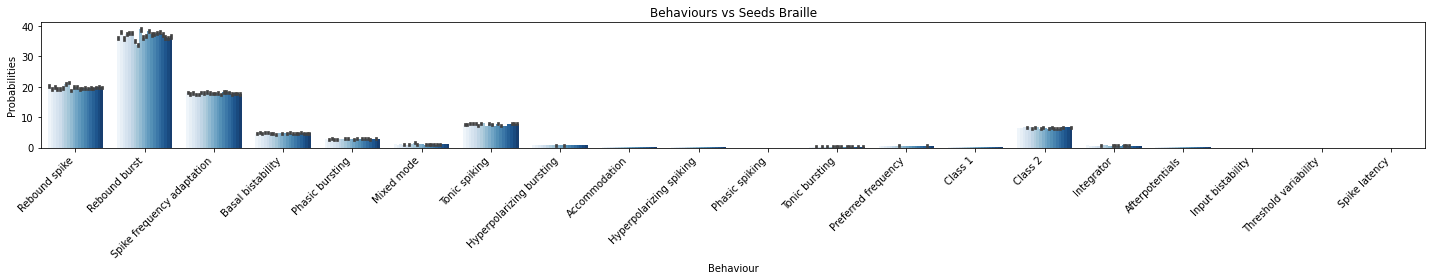

In [11]:
plt.figure(figsize=(20,4))

g = sn.barplot(x='Behaviour', y='Probabilities',hue = 'seed',data=activity_braille,palette='Blues')#,order=activity_new.sort_values(by=['Probabilities'], ascending=False).set_index('Behaviour').index)
g.set_xticklabels(g.get_xticklabels(), rotation = 45,horizontalalignment='right')
g.get_legend().remove()

plt.title('Behaviours vs Seeds Braille')
plt.tight_layout()
plt.savefig('Probabilities_Behaviours_vs_seed_Braille',transparent= False)

In [12]:
folder = 'results/activity_classification/MN_activity/MN_Output_MNIST_c/*'
files = glob.glob(folder)
print(files)
print(len(files))

['results/activity_classification/MN_activity/MN_Output_MNIST_c/GR_mnist_compressed_w_5_eval_20240126_145344.pkl', 'results/activity_classification/MN_activity/MN_Output_MNIST_c/GR_mnist_compressed_w_5_test_20240126_145344.pkl', 'results/activity_classification/MN_activity/MN_Output_MNIST_c/GR_mnist_compressed_w_6_eval_20240126_145344.pkl', 'results/activity_classification/MN_activity/MN_Output_MNIST_c/GR_mnist_compressed_w_7_eval_20240126_145344.pkl', 'results/activity_classification/MN_activity/MN_Output_MNIST_c/GR_mnist_compressed_w_11_train_20240126_145344.pkl', 'results/activity_classification/MN_activity/MN_Output_MNIST_c/GR_mnist_compressed_w_9_train_20240126_145344.pkl', 'results/activity_classification/MN_activity/MN_Output_MNIST_c/GR_mnist_compressed_w_19_test_20240126_145344.pkl', 'results/activity_classification/MN_activity/MN_Output_MNIST_c/GR_mnist_compressed_w_16_train_20240126_145344.pkl', 'results/activity_classification/MN_activity/MN_Output_MNIST_c/GR_mnist_compresse

In [13]:
activity = pd.read_pickle(files[0])
activity = activity.rename(columns={"Digit":"Letter"})
print(activity.columns)

Index(['Letter', 'Behaviour', 'Probabilities', 'Spikes', 'Sparsity'], dtype='object')


In [14]:
import tqdm.notebook as tqdm
lbl_string = ['Space', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
    'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

labels_mapping = {
    'A': "Tonic spiking",
    'B': "Class 1",
    'C': "Spike frequency adaptation",
    'D': "Phasic spiking",
    'E': "Accommodation",
    'F': "Threshold variability",
    'G': "Rebound spike",
    'H': "Class 2",
    'I': "Integrator",
    'J': "Input bistability",
    'K': "Hyperpolarizing spiking",
    'L': "Hyperpolarizing bursting",
    'M': "Tonic bursting",
    'N': "Phasic bursting",
    'O': "Rebound burst",
    'P': "Mixed mode",
    'Q': "Afterpotentials",
    'R': "Basal bistability",
    'S': "Preferred frequency",
    'T': "Spike latency",
}

activity_total = []
activity_new = {'Letter':[], 'Probabilities':[],'Behaviour':[], 'seed':[], 'type':[],'dataset':[]}
import re
for f_idx in tqdm.tqdm(range(len(files))):
    
    activity = pd.read_pickle(files[f_idx])
    activity = activity.rename(columns={"Digit":"Letter"})

    for row in activity.iterrows():
        for b_idx,b in enumerate(labels_mapping.keys()):
            # print(row[1]['Letter'], row[1]['Probabilities'][0][b_idx])
            activity_new['Letter'].append(row[1]['Letter'])
            activity_new['Probabilities'].append(float(row[1]['Probabilities'][0][b_idx]))
            activity_new['Behaviour'].append(labels_mapping[b])
            activity_new['seed'].append(re.findall(r'\d+', files[f_idx])[0])
            activity_new['type'].append(re.findall(r'train|eval|test', files[f_idx])[0])
            activity_new['dataset'].append('MNIST_c')

            # print(activity_new['Letter'][-1], activity_new['Probabilities'][-1], activity_new['Behaviour'][-1], activity_new['seed'][-1], activity_new['type'][-1])
    # activity_total.append(activity_new)
    ## search for the word train, eval or test
    # classified_activity['type'] = re.findall(r'train|eval|test', file)[0]

  0%|          | 0/57 [00:00<?, ?it/s]

In [15]:
activity_MNIST_c = pd.DataFrame(activity_new)
activity_MNIST_c = activity_MNIST_c.sort_values(by=['Letter'],ascending=True).sort_values(by=['Probabilities'],ascending=False)

In [16]:
activity_merged = pd.concat([activity_braille,activity_MNIST_c])

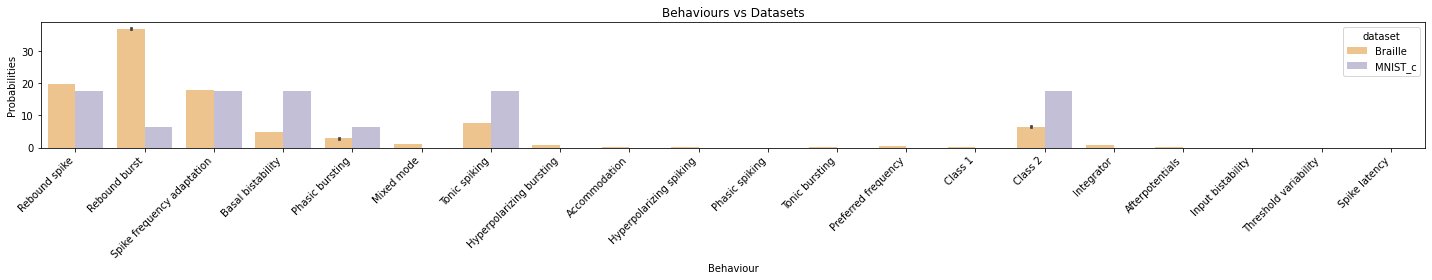

In [17]:
plt.figure(figsize=(20,4))

g = sn.barplot(x='Behaviour', y='Probabilities',hue = 'dataset',data=activity_merged,palette='PuOr')#,order=activity_new.sort_values(by=['Probabilities'], ascending=False).set_index('Behaviour').index)
g.set_xticklabels(g.get_xticklabels(), rotation = 45,horizontalalignment='right')
# g.get_legend().remove()

plt.title('Behaviours vs Datasets')
plt.tight_layout()
plt.savefig('Probabilities_Behaviours_vs_dataset',transparent= False)